# 2. Data Visualization
In this notebook we will use our extracted data and visualize it. For that purpose, we are importing function from our ```modules``` folder.

## 2.1 Libraries

We import the necessary libraries, including our own library in the modules file

In [1]:
# Warnings
import warnings
warnings.filterwarnings("ignore")

# Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import seaborn as sns
from scipy import stats
from functools import reduce

# Statsmodels
import statsmodels.api as sm
import pmdarima as pmd
from pmdarima.arima import auto_arima
from statsmodels.tsa.api import VAR
from statsmodels.tsa.vector_ar.var_model import VARResults
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

# Machine Learning models
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.linear_model import Ridge, Lasso, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    mean_absolute_percentage_error,
    median_absolute_error,
    r2_score,
    precision_score

)

from xgboost import XGBRegressor

In [2]:
# We import our own functions
import sys
sys.path.append('../../..')  # Move two levels up to the project root
from modules.functions import *

## 2.2 Loading dataframe

In [2]:
df = pd.read_csv('../../../input/df_raw_test.csv', parse_dates=['Fecha'], index_col='Fecha')
df.head()

CPI  Monetary Policy Rate  \
Fecha                                        
2003-09-01  0.518834                  2.75   
2003-10-01  0.492247                  2.75   
2003-11-01  0.465462                  2.50   
2003-12-01  0.438413                  2.50   
2004-01-01  0.411138                  2.50   

            Circulating Currency Seasonally Adjusted (mill S/)  \
Fecha                                                            
2003-09-01                                           8.591877    
2003-10-01                                           8.602051    
2003-11-01                                           8.613430    
2003-12-01                                           8.629901    
2004-01-01                                           8.649204    

            Net International Reserves (mill $)  Real Minimum Wage (Index)  \
Fecha                                                                        
2003-09-01                             9.185581                   5.440117   
2003-10-01                             9.191108                   5.495508   
2003-11-01                             9.240173                   5.493832   
2003-12-01                             9.229584                   5.488208   
2004-01-01                             9.265177                   5.482848   

            Wheat (US$ per ton)  Corn  (US$ per ton)  \
Fecha                                                  
2003-09-01             4.884206             4.419001   
2003-10-01             4.900658             4.390800   
2003-11-01             5.009696             4.463461   
2003-12-01             5.046169             4.511148   
2004-01-01             5.049709             4.571827   

            Soybean oil (US$ per ton)  Crude oil (US$ per barrel)  
Fecha                                                              
2003-09-01                   6.238332                    3.348787  
2003-10-01                   6.404890                    3.412510  
2003-11-01                   6.421768                    3.434971  
2003-12-01                   6.471752                    3.472088  
2004-01-01                   6.498180                    3.531787

In [3]:
df_lags = pd.read_csv('../../../input/df_lags_test.csv', parse_dates=['Fecha'], index_col='Fecha')
df_lags.head()

CPI  Monetary Policy Rate_lag_1  Monetary Policy Rate_lag_2  \
Fecha                                                                          
2004-01-01  0.411138                         2.5                         2.5   
2004-02-01  0.383700                         2.5                         2.5   
2004-03-01  0.356172                         2.5                         2.5   
2004-04-01  0.328509                         2.5                         2.5   
2004-05-01  0.300724                         2.5                         2.5   

            Monetary Policy Rate_lag_3  Monetary Policy Rate_lag_4  \
Fecha                                                                
2004-01-01                        2.75                        2.75   
2004-02-01                        2.50                        2.75   
2004-03-01                        2.50                        2.50   
2004-04-01                        2.50                        2.50   
2004-05-01                        2.50                        2.50   

            Circulating Currency Seasonally Adjusted (mill S/)_lag_1  \
Fecha                                                                  
2004-01-01                                           8.629901          
2004-02-01                                           8.649204          
2004-03-01                                           8.666063          
2004-04-01                                           8.687899          
2004-05-01                                           8.709486          

            Circulating Currency Seasonally Adjusted (mill S/)_lag_2  \
Fecha                                                                  
2004-01-01                                           8.613430          
2004-02-01                                           8.629901          
2004-03-01                                           8.649204          
2004-04-01                                           8.666063          
2004-05-01                                           8.687899          

            Circulating Currency Seasonally Adjusted (mill S/)_lag_3  \
Fecha                                                                  
2004-01-01                                           8.602051          
2004-02-01                                           8.613430          
2004-03-01                                           8.629901          
2004-04-01                                           8.649204          
2004-05-01                                           8.666063          

            Circulating Currency Seasonally Adjusted (mill S/)_lag_4  \
Fecha                                                                  
2004-01-01                                           8.591877          
2004-02-01                                           8.602051          
2004-03-01                                           8.613430          
2004-04-01                                           8.629901          
2004-05-01                                           8.649204          

            Net International Reserves (mill $)_lag_1  ...  \
Fecha                                                  ...   
2004-01-01                                   9.229584  ...   
2004-02-01                                   9.265177  ...   
2004-03-01                                   9.259417  ...   
2004-04-01                                   9.250628  ...   
2004-05-01                                   9.256366  ...   

            Corn  (US$ per ton)_lag_3  Corn  (US$ per ton)_lag_4  \
Fecha                                                              
2004-01-01                   4.390800                   4.419001   
2004-02-01                   4.463461                   4.390800   
2004-03-01                   4.511148                   4.463461   
2004-04-01                   4.571827                   4.511148   
2004-05-01                   4.650534                   4.571827   

            Soybean oil (US$ per 

## 2.3 Visualizing our data

We do a quick inspect in our data by plotting our input variables

In [4]:
len(df.columns)

9

In [5]:
# We select our input variables: all except CPI
df_variables = df.loc[:, ['Monetary Policy Rate',
       'Circulating Currency Seasonally Adjusted (mill S/)',
       'Net International Reserves (mill $)', 'Real Minimum Wage (Index)',
       'Wheat (US$ per ton)', 'Corn  (US$ per ton)', 
       'Soybean oil (US$ per ton)', 'Crude oil (US$ per barrel)']]

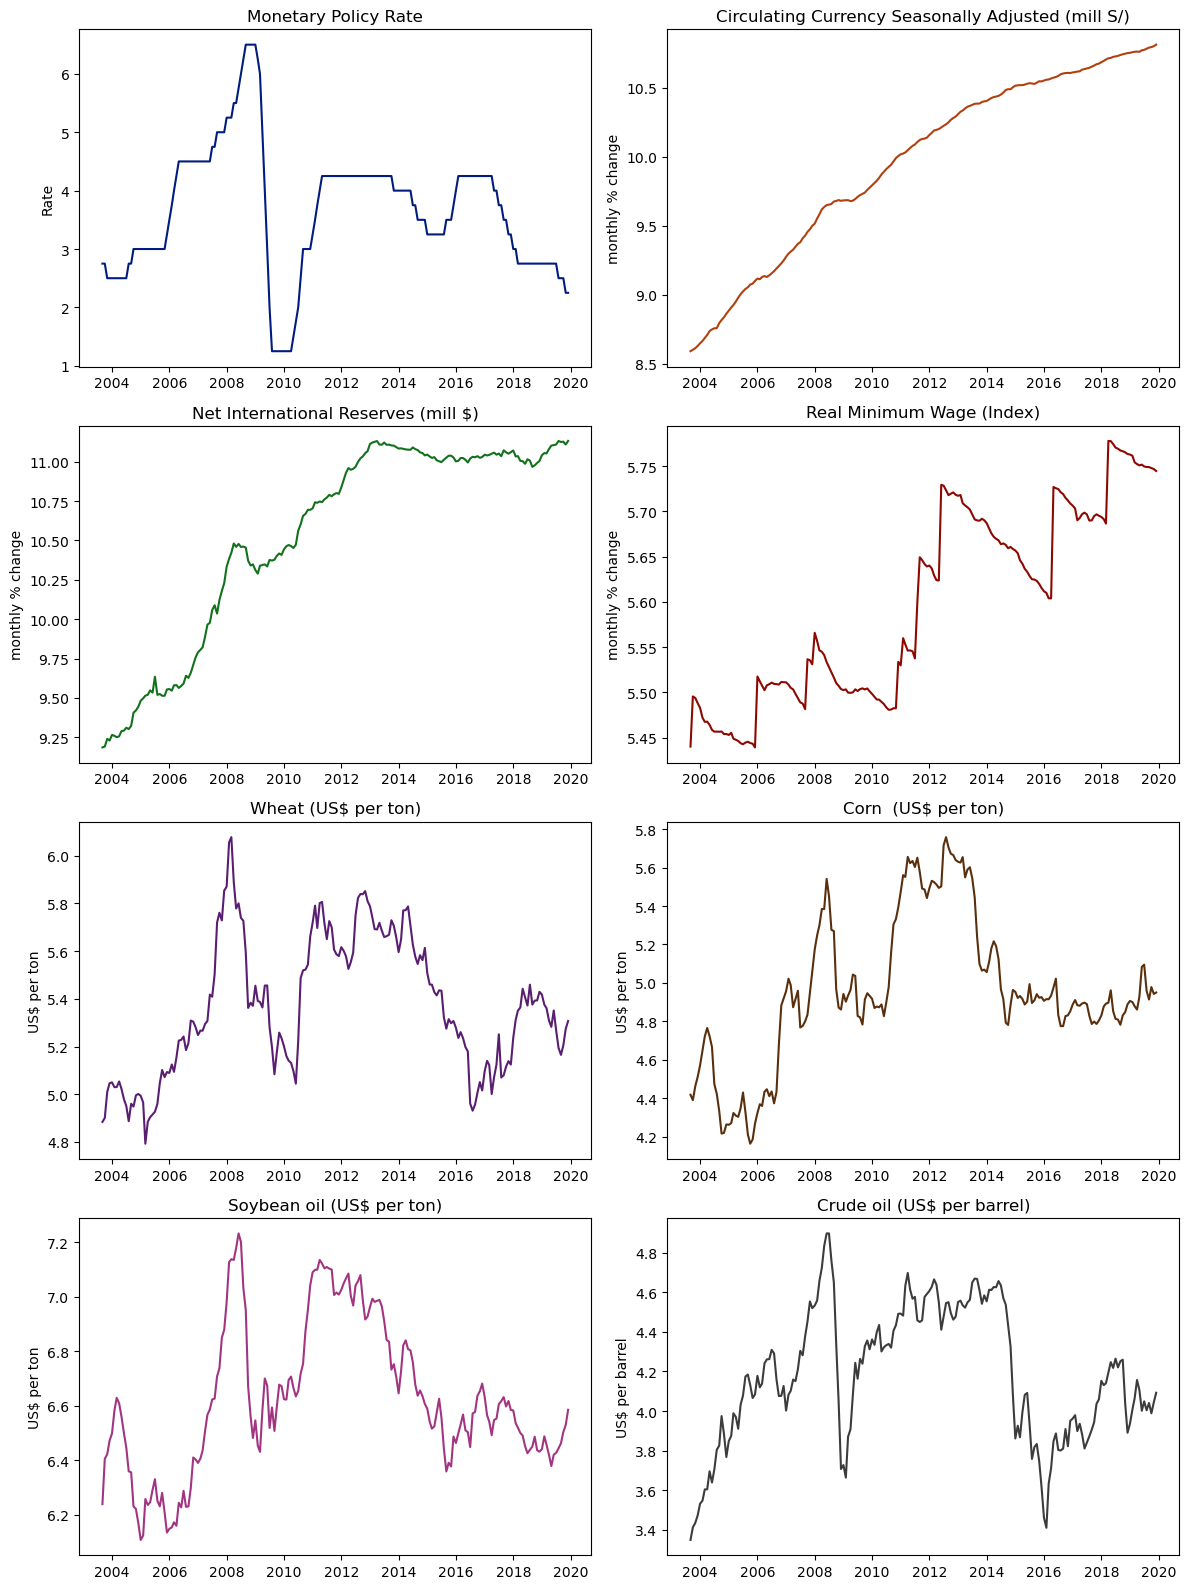

In [9]:
# Groups of variables
rate_columns = ["Reserve Requirement Rate", "Monetary Policy Rate"]
usd_per_ton_columns = ["Wheat (US$ per ton)", "Corn  (US$ per ton)", "Soybean oil (US$ per ton)"]
usd_per_barrel_columns = ["Crude oil (US$ per barrel)"]

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))

columns = df_variables.columns

colors = sns.color_palette("dark", n_colors=len(columns))

# We iterate over the rows and columns for each plot
for i in range(8):
    for j in range(2):
        index = i * 2 + j
        if index < len(columns):
            ax = axes[i, j]
            ax.plot(df.index, df[columns[index]], color=colors[index])
            ax.set_title(columns[index])
            if columns[index] in rate_columns:
                ax.set_ylabel('Rate')
            elif columns[index] in usd_per_ton_columns:
                ax.set_ylabel('US$ per ton')
            elif columns[index] in usd_per_barrel_columns:
                ax.set_ylabel('US$ per barrel')
            else:
                ax.set_ylabel('monthly % change')

plt.tight_layout()

plt.savefig('../../../output/2_DataVisualization/plot_variables_h19.png')
plt.show()

## 2.4 Getting correlations

First, we obtain the correlations between the Consumer Price Index (IPC) and all the variables

In [9]:
corr = df.corr()['CPI']
pd.DataFrame(corr)

CPI
CPI                                                 1.000000
CPI Tradable                                        0.826410
CPI Non-Tradable                                    0.949601
CPI Core                                            0.635439
CPI Non-Core                                        0.856538
CPI Food and Energy                                 0.947751
CPI Excluding Food and Energy                       0.356521
CPI Food and Beverages                              0.953130
CPI Excluding Food and Beverages                    0.473752
CPI Core Excluding Food and Beverages               0.299110
CPI Imported                                        0.404867
Wholesale Price Index                               0.667559
Reserve Requirement Rate                            0.270259
Monetary Policy Rate                                0.449832
Circulating Currency Seasonally Adjusted (mill S/)  0.093122
Net International Reserves (mill $)                 0.056682
Real Minimum Wage (Index)                           0.038882
Wheat (US$ per ton)                                -0.030980
Corn  (US$ per ton)                                -0.003915
Soybean oil (US$ per ton)                           0.030080
Crude oil (US$ per barrel)                         -0.063505

Then, we obtain the correlations between the Core Consumer Price Index (IPC Alimentos y Energía) and all the variables

## 2.5 Visualizing correlations

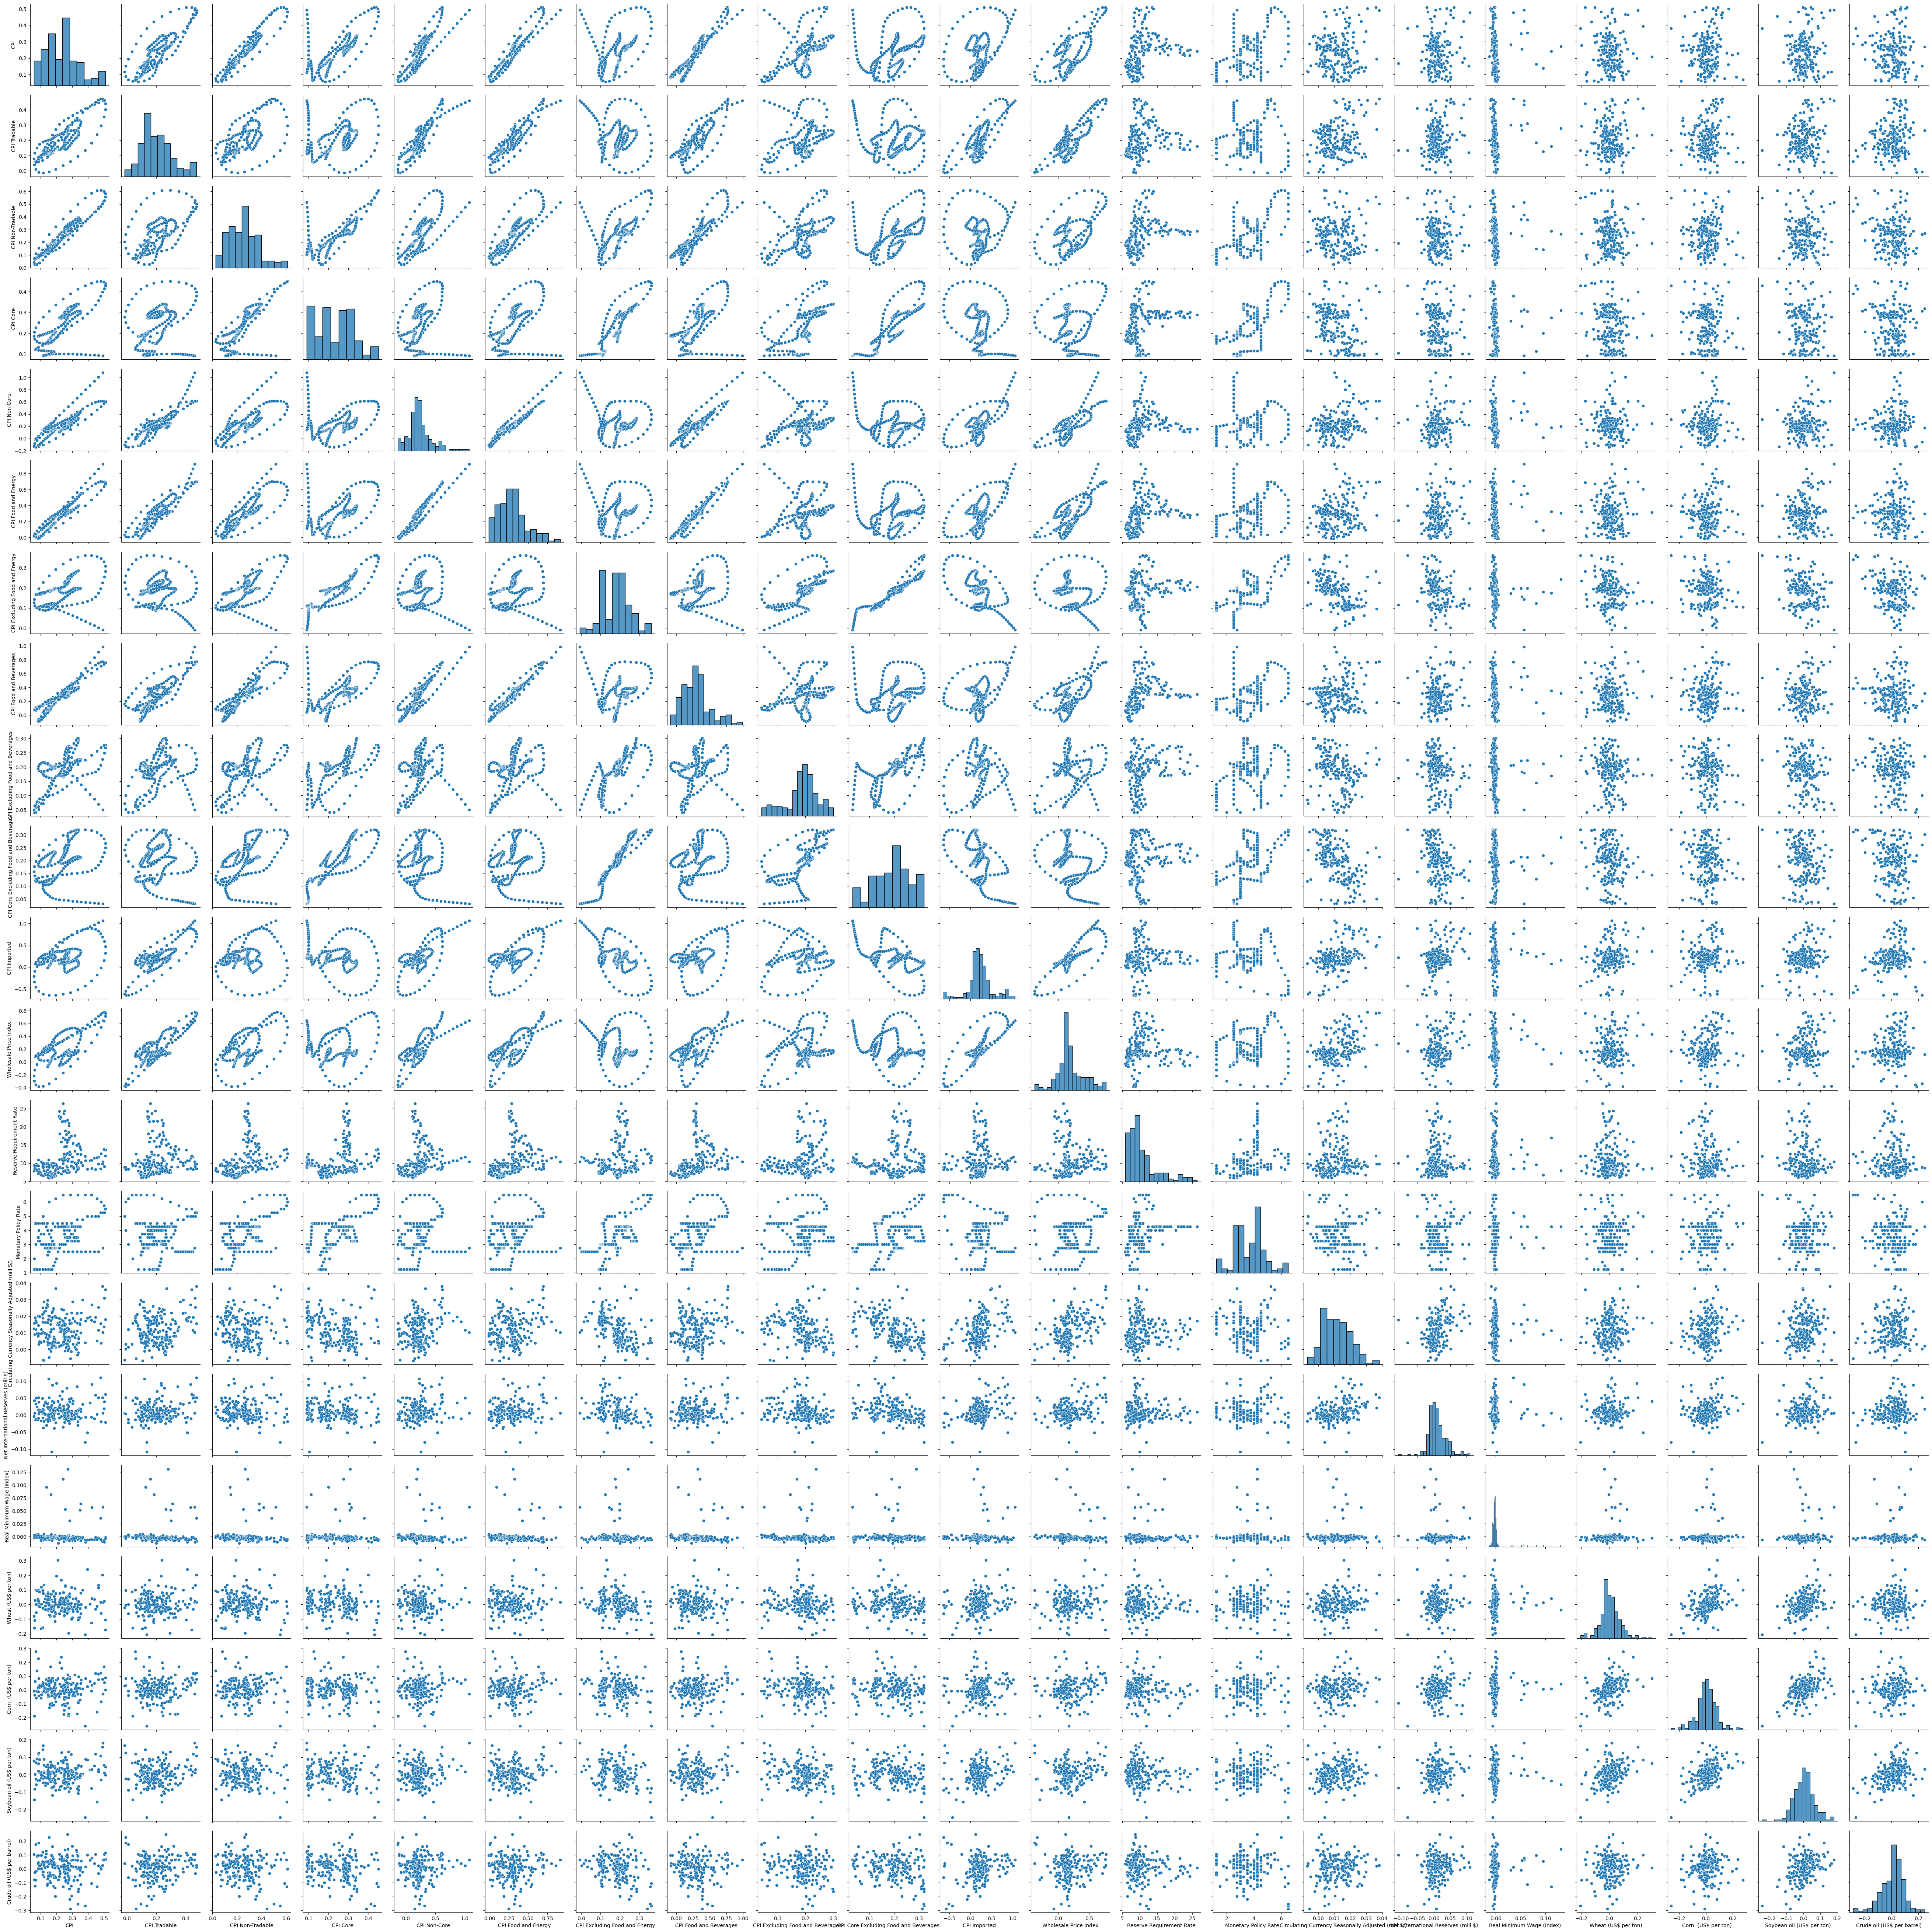

In [10]:
sns.pairplot(df)
plt.tight_layout(pad=1.0)
plt.savefig('../../../output/2_DataVisualization/pairplot_h19.png')

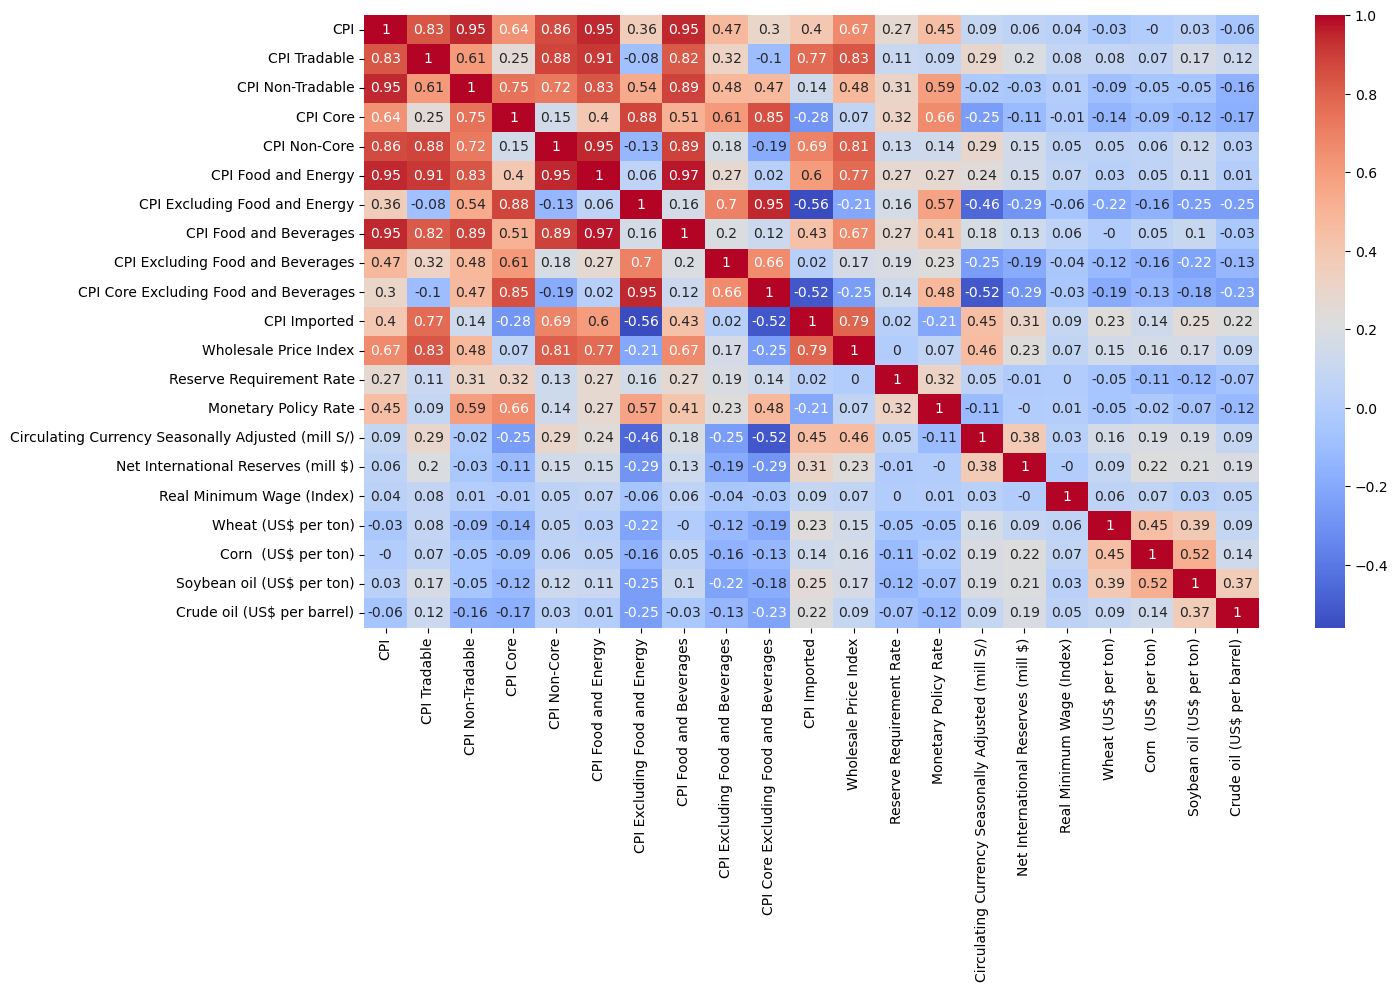

In [11]:
corr = df.corr().round(2)
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.tight_layout(pad=1.0)
plt.savefig('../../../output/2_DataVisualization/heatmap_h19.png')

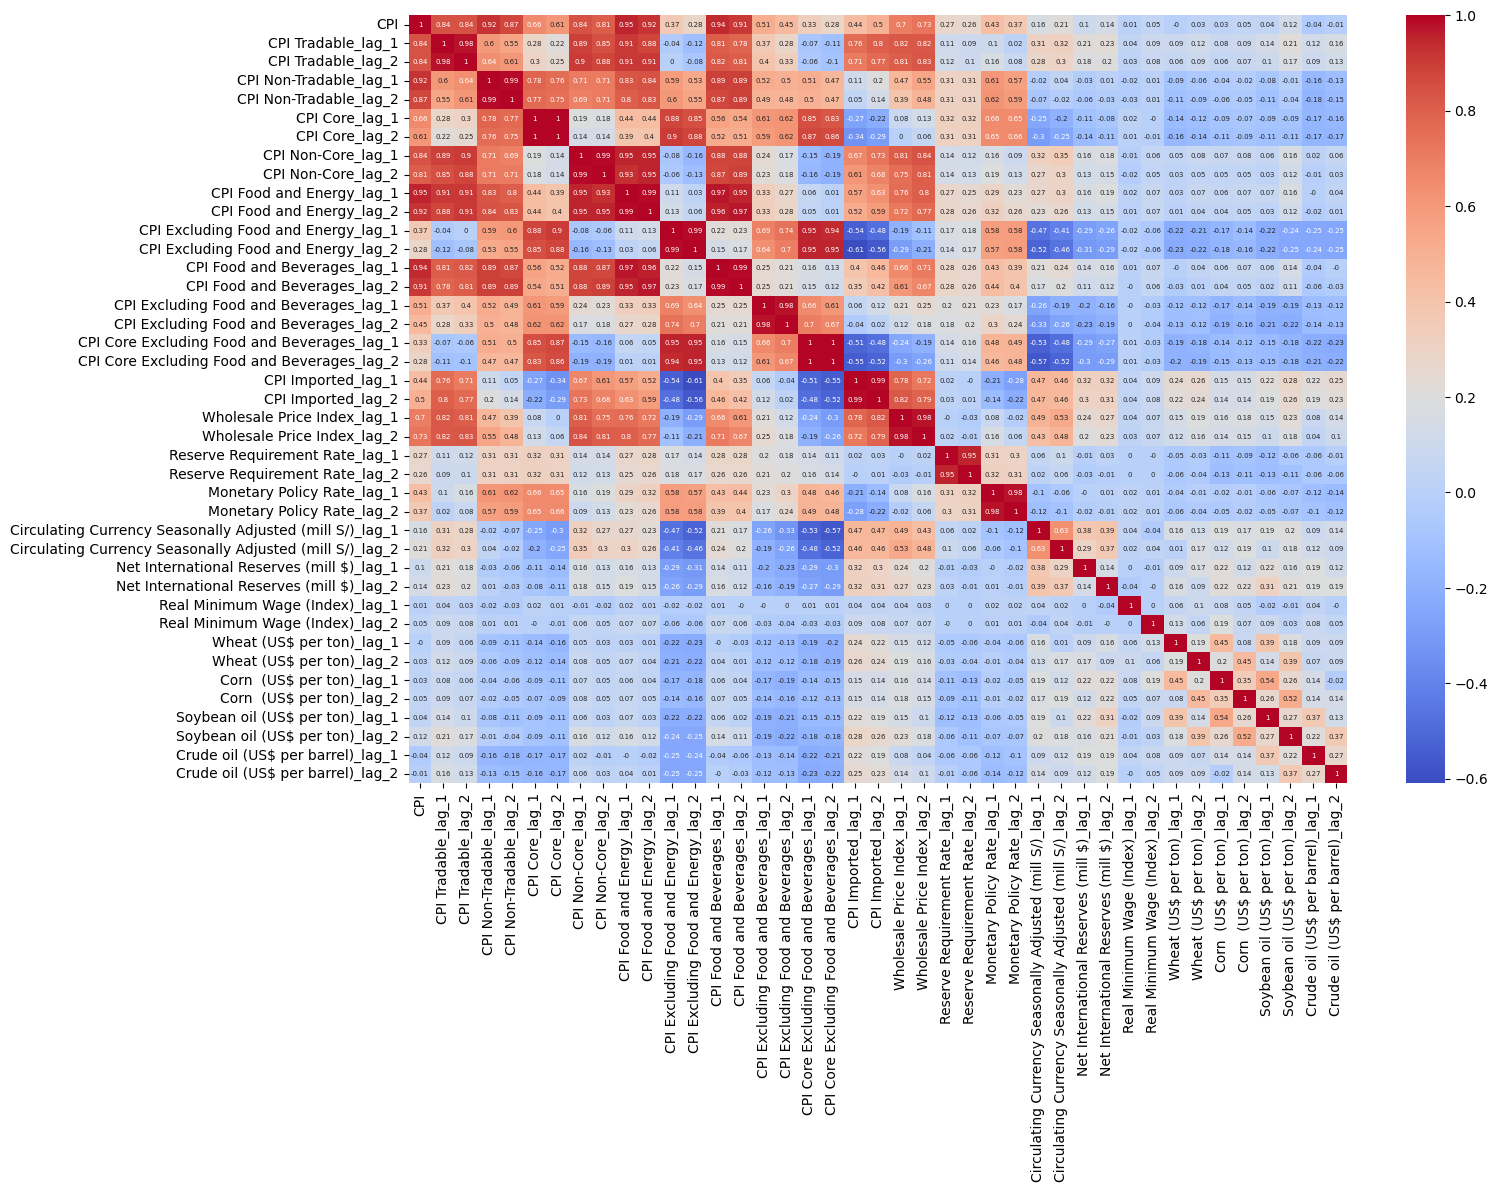

In [12]:
corr = df_lags.corr().round(2)
plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot=True, cmap='coolwarm', annot_kws={"size": 5})
plt.tight_layout(pad=1.0)
plt.savefig('../../../output/2_DataVisualization/heatmap_lags_h19.png')